In [1]:
## plot within the notebook
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from astrobject.astrobject.instruments import sdss as s

In [3]:
# -- Load an instrument. SDSS image for instance
sdss = s.sdss("data/sdss_PTF10qjq_g.fits")
# Would you like to know the bandpass ?
print sdss.bandname

sdssg


In [4]:
# This is now thight to sncosmo BandPass
bandpass = sdss.bandpass
print bandpass.trans

[  1.00000000e-04   9.00000000e-04   1.60000000e-03   2.20000000e-03
   2.10000000e-03   1.90000000e-03   1.90000000e-03   2.20000000e-03
   2.90000000e-03   4.10000000e-03   7.20000000e-03   1.38000000e-02
   2.24000000e-02   3.25000000e-02   4.78000000e-02   6.36000000e-02
   8.09000000e-02   9.91000000e-02   1.18600000e-01   1.42000000e-01
   1.65300000e-01   1.81300000e-01   1.94400000e-01   2.07800000e-01
   2.21200000e-01   2.34500000e-01   2.44600000e-01   2.53400000e-01
   2.61500000e-01   2.67200000e-01   2.72800000e-01   2.78400000e-01
   2.84000000e-01   2.89700000e-01   2.95500000e-01   3.01100000e-01
   3.05800000e-01   3.10300000e-01   3.14700000e-01   3.19200000e-01
   3.23600000e-01   3.28100000e-01   3.32600000e-01   3.36800000e-01
   3.40100000e-01   3.43200000e-01   3.46300000e-01   3.49400000e-01
   3.52600000e-01   3.55700000e-01   3.58600000e-01   3.61100000e-01
   3.63600000e-01   3.66100000e-01   3.68500000e-01   3.70700000e-01
   3.72800000e-01   3.75100000e-01

{'ax': <matplotlib.axes._axes.Axes at 0x108191ed0>,
 'figure': <matplotlib.figure.Figure at 0x1081c20d0>,
 'imshow': <matplotlib.image.AxesImage at 0x10eba48d0>,
 'prop': {'interpolation': 'nearest', 'origin': 'lower'},
 'target_plot': None,
 'wcs_coords': False}

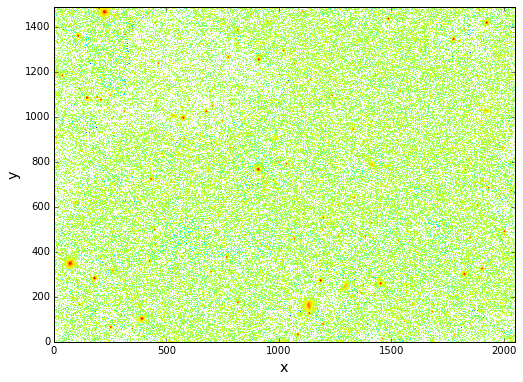

In [5]:
# ================== #
# = This Image     = #
# ================== #
sdss.show()

In [6]:
# ========================== #
# = Easy Catalogue Access  = #
# ========================== #
# - this will set the catalogue to the object
sdss.download_catalogue() 
# --> option e.g. source="sdss" / you can add filter: column_filters={"imag":"13..21"}
# see sdss.fetch_sdss_catalogue or instrument.catalogue (the latter calls the former if source=="sdss")


{'ax': <matplotlib.axes._axes.Axes at 0x1109d9c90>,
 'figure': <matplotlib.figure.Figure at 0x110b354d0>,
 'imshow': <matplotlib.image.AxesImage at 0x110278ed0>,
 'prop': {'interpolation': 'nearest', 'origin': 'lower'},
 'target_plot': None,
 'wcs_coords': False}

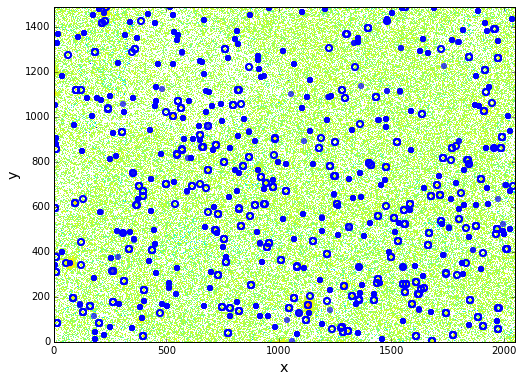

In [7]:
# if you show now, the catalogue will be displaid (see the display_catalogue method)
sdss.show() # you can set show_catalogue=False top avoid showing the catalogue even if you have it.

# Legend: Full marker = stars / Open markers = non-stars (galaxies)

In [8]:
# ============================== #
# = Easy Sextractor Extraction = #
# ============================== #
sdss.sep_extract()
# - This fill the sepobjects entry, you can directly have it with the option returnobjects=True
# or you can retreive it.
o = sdss.sepobjects

{'ax': <matplotlib.axes._axes.Axes at 0x1109bbb10>,
 'figure': <matplotlib.figure.Figure at 0x1106582d0>,
 'imshow': <matplotlib.image.AxesImage at 0x11297c8d0>,
 'prop': {'interpolation': 'nearest', 'origin': 'lower'},
 'target_plot': None,
 'wcs_coords': False}

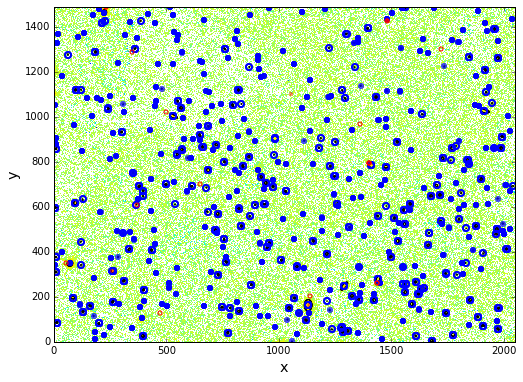

In [9]:
# IMPORTANT
# if you have both a catalogue and a sepobjects *AN AUTOMATIC MATCHING WILL BE PERFORMED*
# Note, there is no order, you can first set a catalogue and then do sep_extract or the other way around

# -- This lets show again to see
sdss.show()

# - in red (with the same open/fill code) the points in the catalogue with no sep/sextractor matching

(550, 700)

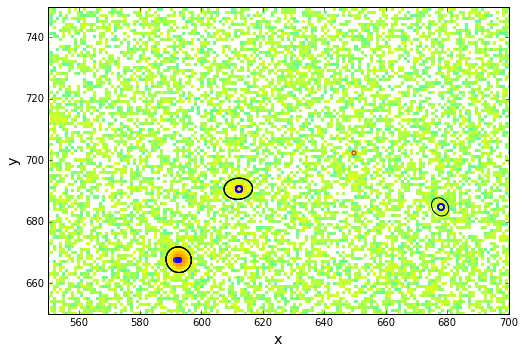

In [11]:
# lets zoom in
sdss.show(show=False)
sdss._plot["ax"].set_ylim(650,750)
sdss._plot["ax"].set_xlim(550,700)

In [12]:
# ------------------- #
# - THE SEXOBJECT    - #
# ------------------- #
print o.catmatch
# idx = The index in the sextractor data
# idx_catalogue = The index in the catalogue 
# remark you have access to the catalogue in sdss.catalogue or o.catalogue (this is the same)

{'angsep': <Angle [  2.84904757e-05,  4.50326514e-05,  3.45607495e-05,...,
          3.25413134e-05,  9.06575462e-06,  1.45658933e-05] deg>, 'idx': array([44, 44, 44, ..., 83, 83, 83]), 'idx_catalogue': array([   0,    1,    2, ..., 1617, 1618, 1619])}


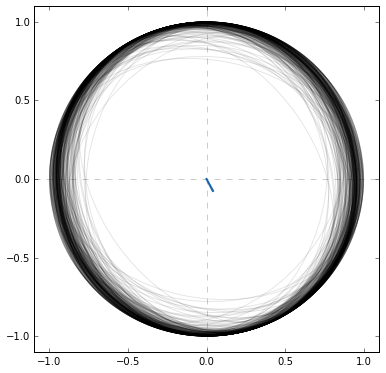

In [13]:
# -- Some statistics
o.show_ellipses(stars_only=True)
# This gives you the typical PSF shape. The blue line (triagle in fact) is the typical angle
# the size is the ellipticity

In [14]:
# -- usefull method "get". give a keywork and this will retreive the associated data
o.get("help") # set help to have a list of the avialable keywords

 Known keys are: cxx ,cxy ,ycpeak ,xy ,xmin ,y2 ,xpeak ,ymin ,ymax ,tnpix ,cpeak ,theta ,xcpeak ,cyy ,flag ,thresh ,peak ,x2 ,ypeak ,cflux ,a ,b ,npix ,flux ,xmax ,y ,x ,angsep ,elongation ,ellipticity


In [15]:
o.get("x")[:10] # only the first 10 here

array([  177.84588567,   549.54374427,  1058.05429586,  1277.61493231,
        2044.7318798 ,  1678.19459088,  1918.64387743,   255.02852975,
         182.90271419,  1456.38492678])

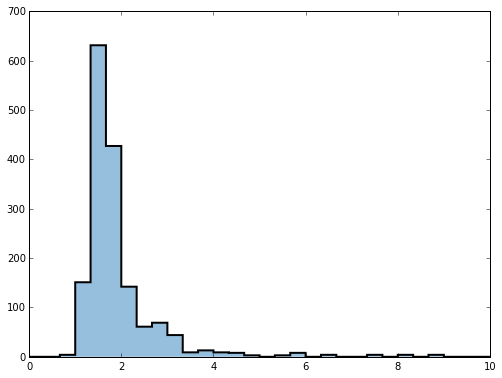

In [16]:
# show the distribution of any keyword
o.show_hist("a",bins=30, range=[0,10])

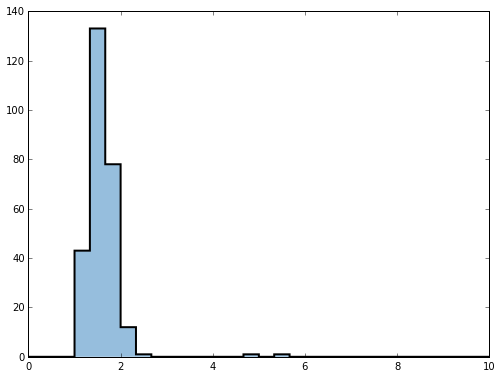

In [17]:
# - or just for the stars
o.show_hist("a",bins=30, range=[0,10], stars_only=True)